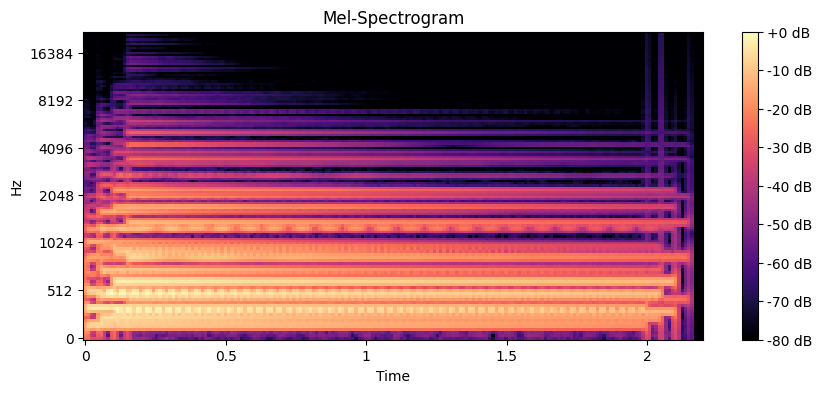

In [2]:
# First, install the necessary libraries if not installed yet
# !pip install librosa matplotlib

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load your audio file (change the path to the file you want to visualize)
audio_file_path = './Audio_Files/Major/Major_10.wav'  # Replace with the actual path to your audio file

# Load the audio file
y, sr = librosa.load(audio_file_path, sr=None)  # sr=None keeps the original sample rate

# Generate the Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB (decibels)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the spectrogram using librosa's display module
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()
